In [35]:
from open_ephys.analysis import Session
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
directory = 'C:\\Users\\Caltech University\\Documents\\Open Ephys\\2022-09-30_11-24-36'
session = Session(directory)

In [3]:
print(session.recordnodes[0].recordings[0])

Open Ephys GUI Recording
ID: 0x2314d0901c0
Format: Binary
Directory: C:\Users\Caltech University\Documents\Open Ephys\2022-09-30_11-24-36\Record Node 104\experiment1\recording1
Experiment Index: 0
Recording Index: 0


In [6]:
session.recordnodes[0].recordings[0].spikes

[]

In [92]:
open_ephys_timestamps = []
for i in range(1,2):
    open_ephys_timestamps.append(40000*np.load('C:\\Users\\Caltech University\\Documents\\Open Ephys\\2022-09-30_12-11-30\\Record Node 104\\experiment1\\recording1\\spikes\\Spike_Detector-102.example_data\\Electrode {}\\timestamps.npy'.format(i)))

In [93]:
open_ephys_timestamps_concat = np.concatenate(open_ephys_timestamps)

In [87]:
chs = np.load('C:\\Users\\Caltech University\\Documents\\Open Ephys\\2022-09-30_11-24-36\\spike_channels.npy')
timestamps = np.load('C:\\Users\\Caltech University\\Documents\\Open Ephys\\2022-09-30_11-24-36\\spike_timestamps.npy')

In [88]:
timestamps = timestamps[chs==0]

In [89]:
timestamps.shape

(1031,)

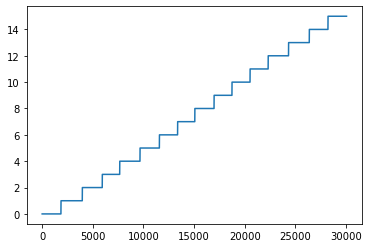

In [15]:
plt.plot(chs)

In [51]:
timestamps.shape

(30043,)

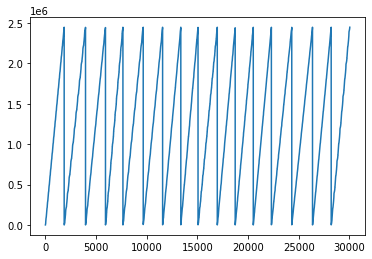

In [17]:
plt.plot(timestamps)

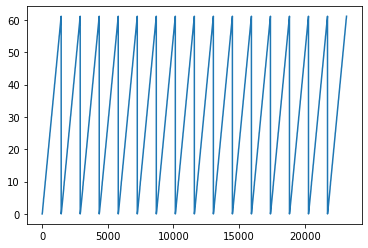

In [25]:
plt.plot(open_ephys_timestamps_concat)

In [30]:
open_ephys_timestamps_concat*40000

array([1.092000e+03, 1.884000e+03, 2.161000e+03, ..., 2.443818e+06,
       2.444719e+06, 2.444804e+06])

In [31]:
timestamps

array([    303,     654,    1092, ..., 2440443, 2441700, 2446376],
      dtype=int64)

In [37]:
# parse json info
with open(session.recordnodes[0].recordings[0].directory+'\\structure.oebin') as f:
    j = json.load(f)
cts_meta = j['continuous'][0]
n_chan = cts_meta['num_channels']
bit_volts = []
for ch in cts_meta['channels']:
    bit_volts.append(ch['bit_volts'])

# get raw data
samples = session.recordnodes[0].recordings[0].continuous[0].samples

# unit conversion and statistics
samples_mv = samples*np.array(bit_volts)

In [94]:
timestamps.shape, open_ephys_timestamps_concat.shape

((1031,), (1630,))

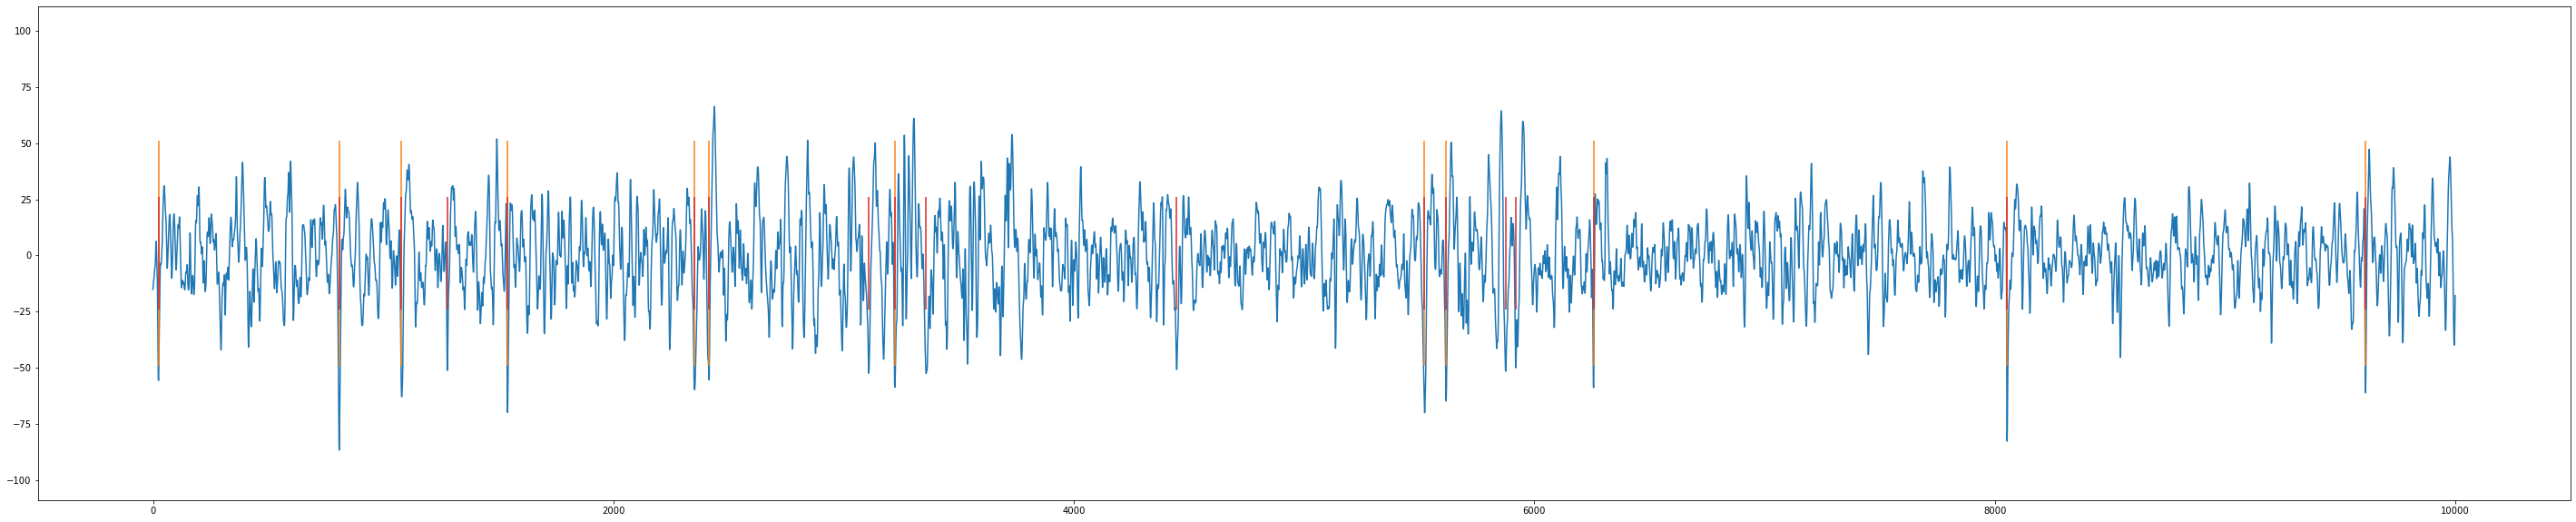

In [95]:
plt.figure(figsize=(50,10))
l, r = 10000, 20000
plt.plot(samples_mv[l:r,0])
plt.eventplot(timestamps[(timestamps>=l) & (timestamps < r)]-l, linelengths=100, color="tab:orange")
plt.eventplot(open_ephys_timestamps_concat[(open_ephys_timestamps_concat>=l) & (open_ephys_timestamps_concat < r)]-l, linelengths=50, color="tab:red")


In [69]:
open_ephys_timestamps_concat[(open_ephys_timestamps_concat>=1000) & (open_ephys_timestamps_concat < 2000)]-1000

array([ 92., 884.,  92., 884.,  92., 884.,  92., 884.,  92., 884.,  92.,
       884.,  92., 884.,  92., 884.,  92., 884.,  92., 884.,  92., 884.,
        92., 884.,  92., 884.,  92., 884.,  92., 884.,  92., 884.])

In [66]:
open_ephys_timestamps_concat*= 40000

In [49]:
timestamps

array([0.0000000e+00, 2.5000000e-05, 5.0000000e-05, ..., 6.1160025e+01,
       6.1160050e+01, 6.1160075e+01])

In [41]:
1000/40000

0.025